# Week 2: Linear Regression

## Stochastic Gradient Descent

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 2.07 s, sys: 390 ms, total: 2.46 s
Wall time: 2.48 s


In [2]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)
f = -3*X

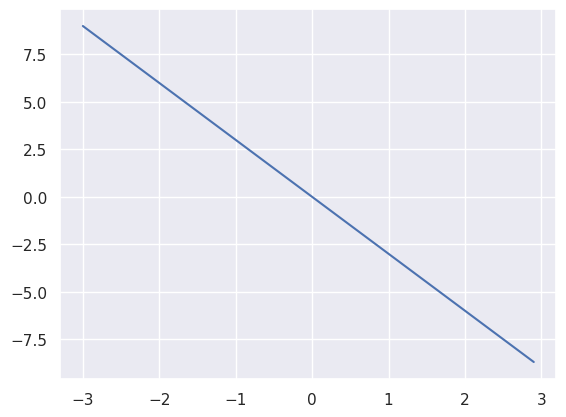

In [3]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [4]:
def forward(x):
    return w * x + b

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [5]:
Y=f+0.1*torch.randn(X.size())
Y

tensor([[ 8.8447],
        [ 8.8629],
        [ 8.3689],
        [ 8.1970],
        [ 7.9009],
        [ 7.7546],
        [ 7.2015],
        [ 6.9928],
        [ 6.7071],
        [ 6.3285],
        [ 6.0004],
        [ 5.5278],
        [ 5.3319],
        [ 5.1261],
        [ 4.9505],
        [ 4.6848],
        [ 4.2402],
        [ 3.6596],
        [ 3.5022],
        [ 3.4173],
        [ 2.9532],
        [ 2.5493],
        [ 2.4777],
        [ 1.9458],
        [ 1.8287],
        [ 1.3671],
        [ 1.2166],
        [ 0.9144],
        [ 0.5989],
        [ 0.2367],
        [-0.0692],
        [-0.2483],
        [-0.6491],
        [-0.8858],
        [-1.0748],
        [-1.4118],
        [-1.9002],
        [-1.9730],
        [-2.3686],
        [-2.6308],
        [-3.1787],
        [-3.3530],
        [-3.6201],
        [-3.7953],
        [-4.2890],
        [-4.5090],
        [-4.7650],
        [-5.0256],
        [-5.3533],
        [-5.9446],
        [-6.0319],
        [-6.2417],
        [-6.

In [7]:
lr=0.1
losss = []
cost = []
for epoch in range(4):
    total = 0
    for x, y in zip(X,Y):
        yhat = forward(x)
        loss = criterion(yhat,y)
        loss.backward()
        print(w.grad)
        w.data = w.data-lr*w.grad.data
        w.grad.data.zero_()

        b.data = b.data-lr*b.grad.data
        b.grad.data.zero_()

        losss.append(loss.item())
        total += loss.item()
    cost.append(total)


tensor(10.3264)
tensor(-7.7268)
tensor(5.4564)
tensor(-3.0905)
tensor(2.0671)
tensor(-0.1400)
tensor(-0.9799)
tensor(0.8723)
tensor(0.0029)
tensor(-0.1824)
tensor(0.0354)
tensor(-0.5273)
tensor(0.4386)
tensor(0.4948)
tensor(0.6228)
tensor(0.4032)
tensor(-0.1385)
tensor(-0.6605)
tensor(0.1569)
tensor(0.6387)
tensor(0.0919)
tensor(-0.0492)
tensor(0.4151)
tensor(-0.0068)
tensor(0.2785)
tensor(0.0627)
tensor(0.2021)
tensor(0.1499)
tensor(0.0957)
tensor(0.0376)
tensor(9.7660e-09)
tensor(-0.0691)
tensor(-0.0941)
tensor(-0.1853)
tensor(-0.3279)
tensor(-0.3318)
tensor(-0.1336)
tensor(-0.5008)
tensor(-0.3199)
tensor(-0.3840)
tensor(0.1487)
tensor(-0.2638)
tensor(-0.3265)
tensor(-0.5914)
tensor(0.1723)
tensor(-0.2508)
tensor(-0.3187)
tensor(-0.3100)
tensor(-0.0451)
tensor(1.0254)
tensor(-0.8855)
tensor(-0.4670)
tensor(0.0122)
tensor(0.5534)
tensor(-0.7146)
tensor(0.3559)
tensor(0.4173)
tensor(-1.3720)
tensor(1.0706)
tensor(-0.7360)
tensor(-5.6473)
tensor(7.0475)
tensor(-6.9418)
tensor(5.5986)
te

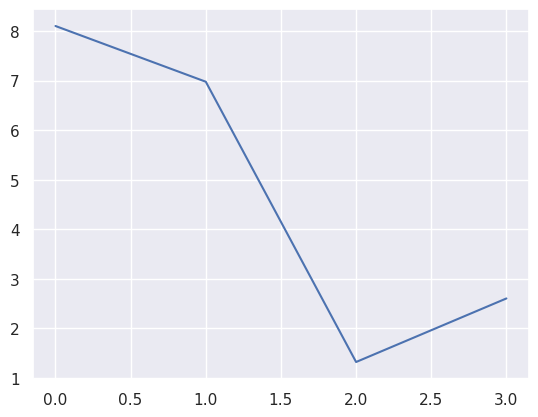

In [8]:
plt.plot(cost)
plt.show()

In [11]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*x+1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [10]:
ds = Data()

In [12]:
loader = DataLoader(dataset=ds, batch_size=1)

In [ ]:
lr=0.1
losss = []
cost = []
for epoch in range(4):
    total = 0
    for x, y in loader:
        yhat = forward(x)
        loss = criterion(yhat,y)
        loss.backward()
        print(w.grad)
        w.data = w.data-lr*w.grad.data
        w.grad.data.zero_()

        b.data = b.data-lr*b.grad.data
        b.grad.data.zero_()

        losss.append(loss.item())
        total += loss.item()
    cost.append(total)
